In [1]:
import pandas as pd

import numpy as np

# filter warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# missingno is also a python visualization library based on matplotlib, which provides a easy way to check lack of data.
import missingno as msno

# import scipy a statistical function library
import scipy.stats as st


In [2]:
# Step one: Import dataset as Train Set and Test Set
# The orginal CSV uses ' ' as the sep, so the attribution sep needs to be ' '
path = './dataset/'
Train_data = pd.read_csv(path+'used_car_train_20200313.csv', sep = ' ')
Test_data = pd.read_csv(path+'used_car_testB_20200421.csv', sep = ' ')

In [3]:
# Skim the train_data
# .append is used to append the last 5 rows of Train_set
Train_data.head().append(Train_data.tail())

SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
0            0     736  20040402   30.0      6       1.0       0.0      0.0   
1            1    2262  20030301   40.0      1       2.0       0.0      0.0   
2            2   14874  20040403  115.0     15       1.0       0.0      0.0   
3            3   71865  19960908  109.0     10       0.0       0.0      1.0   
4            4  111080  20120103  110.0      5       1.0       0.0      0.0   
149995  149995  163978  20000607  121.0     10       4.0       0.0      1.0   
149996  149996  184535  20091102  116.0     11       0.0       0.0      0.0   
149997  149997  147587  20101003   60.0     11       1.0       1.0      0.0   
149998  149998   45907  20060312   34.0     10       3.0       1.0      0.0   
149999  149999  177672  19990204   19.0     28       6.0       0.0      1.0   

        power  kilometer  ...       v_5       v_6       v_7       v_8  \
0          60       12.5  ...  0.235676  0.101988  0.129549  0.022816   
1           0       15.0  ...  0.264777  0.121004  0.135731  0.026597   
2         163       12.5  ...  0.251410  0.114912  0.165147  0.062173   
3         193       15.0  ...  0.274293  0.110300  0.121964  0.033395   
4          68        5.0  ...  0.228036  0.073205  0.091880  0.078819   
149995    163       15.0  ...  0.280264  0.000310  0.048441  0.071158   
149996    125       10.0  ...  0.253217  0.000777  0.084079  0.099681   
149997     90        6.0  ...  0.233353  0.000705  0.118872  0.100118   
149998    156       15.0  ...  0.256369  0.000252  0.081479  0.083558   
149999    193       12.5  ...  0.284475  0.000000  0.040072  0.062543   

             v_9      v_10      v_11      v_12      v_13      v_14  
0       0.097462 -2.881803  2.804097 -2.420821  0.795292  0.914762  
1       0.020582 -4.900482  2.096338 -1.030483 -1.722674  0.245522  
2       0.027075 -4.846749  1.803559  1.565330 -0.832687 -0.229963  
3       0.000000 -4.509599  1.285940 -0.501868 -2.438353 -0.478699  
4       0.121534 -1.896240  0.910783  0.931110  2.834518  1.923482  
149995  0.019174  1.988114 -2.983973  0.589167 -1.304370 -0.302592  
149996  0.079371  1.839166 -2.774615  2.553994  0.924196 -0.272160  
149997  0.097914  2.439812 -1.630677  2.290197  1.891922  0.414931  
149998  0.081498  2.075380 -2.633719  1.414937  0.431981 -1.659014  
149999  0.025819  1.978453 -3.179913  0.031724 -1.483350 -0.342674  

[10 rows x 31 columns]

In [4]:
# check the shape of trainset
Train_data.shape

(150000, 31)

In [5]:
# Skim the test_data
Test_data.head().append(Test_data.tail())

SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
0      200000  133777  20000501   67.0      0       1.0       0.0      0.0   
1      200001   61206  19950211   19.0      6       2.0       0.0      0.0   
2      200002   67829  20090606    5.0      5       4.0       0.0      0.0   
3      200003    8892  20020601   22.0      9       1.0       0.0      0.0   
4      200004   76998  20030301   46.0      6       0.0       NaN      0.0   
49995  249995  111443  20041005    4.0      4       0.0       NaN      1.0   
49996  249996  152834  20130409   65.0      1       0.0       0.0      0.0   
49997  249997  132531  20041211    4.0      4       0.0       0.0      1.0   
49998  249998  143405  20020702   40.0      1       4.0       0.0      1.0   
49999  249999   78202  20090708   32.0      8       1.0       0.0      0.0   

       power  kilometer  ...       v_5       v_6       v_7       v_8  \
0        101       15.0  ...  0.236520  0.000241  0.105319  0.046233   
1         73        6.0  ...  0.261518  0.000000  0.120323  0.046784   
2        120        5.0  ...  0.261691  0.090836  0.000000  0.079655   
3         58       15.0  ...  0.236050  0.101777  0.098950  0.026830   
4        116       15.0  ...  0.257000  0.000000  0.066732  0.057771   
49995    150       15.0  ...  0.263668  0.000292  0.141804  0.076393   
49996    179        4.0  ...  0.255310  0.000991  0.155868  0.108425   
49997    147       12.5  ...  0.262933  0.000318  0.141872  0.071968   
49998    176       15.0  ...  0.282106  0.000023  0.067483  0.067526   
49999      0        3.0  ...  0.231449  0.103947  0.096027  0.062328   

            v_9      v_10      v_11      v_12      v_13      v_14  
0      0.094522  3.619512 -0.280607 -2.019761  0.978828  0.803322  
1      0.035385  2.997376 -1.406705 -1.020884 -1.349990 -0.200542  
2      0.073586 -3.951084 -0.433467  0.918964  1.634604  1.027173  
3      0.096614 -2.846788  2.800267 -2.524610  1.076819  0.461610  
4      0.068852  2.839010 -1.659801 -0.924142  0.199423  0.451014  
49995  0.039272  2.072901 -2.531869  1.716978 -1.063437  0.326587  
49996  0.067841  1.358504 -3.290295  4.269809  0.140524  0.556221  
49997  0.042966  2.165658 -2.417885  1.370612 -1.073133  0.270602  
49998  0.009006  2.030114 -2.939244  0.569078 -1.718245  0.316379  
49999  0.110180 -3.689090  2.032376  0.109157  2.202828  0.847469  

[10 rows x 30 columns]

In [6]:
# check the shape of testset
Test_data.shape

(50000, 30)

In [7]:
# using .describe() to show the numerical measures of test and train data_set
Train_data.describe()

SaleID           name       regDate          model  \
count  150000.000000  150000.000000  1.500000e+05  149999.000000   
mean    74999.500000   68349.172873  2.003417e+07      47.129021   
std     43301.414527   61103.875095  5.364988e+04      49.536040   
min         0.000000       0.000000  1.991000e+07       0.000000   
25%     37499.750000   11156.000000  1.999091e+07      10.000000   
50%     74999.500000   51638.000000  2.003091e+07      30.000000   
75%    112499.250000  118841.250000  2.007111e+07      66.000000   
max    149999.000000  196812.000000  2.015121e+07     247.000000   

               brand       bodyType       fuelType        gearbox  \
count  150000.000000  145494.000000  141320.000000  144019.000000   
mean        8.052733       1.792369       0.375842       0.224943   
std         7.864956       1.760640       0.548677       0.417546   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         6.000000       1.000000       0.000000       0.000000   
75%        13.000000       3.000000       1.000000       0.000000   
max        39.000000       7.000000       6.000000       1.000000   

               power      kilometer  ...            v_5            v_6  \
count  150000.000000  150000.000000  ...  150000.000000  150000.000000   
mean      119.316547      12.597160  ...       0.248204       0.044923   
std       177.168419       3.919576  ...       0.045804       0.051743   
min         0.000000       0.500000  ...       0.000000       0.000000   
25%        75.000000      12.500000  ...       0.243615       0.000038   
50%       110.000000      15.000000  ...       0.257798       0.000812   
75%       150.000000      15.000000  ...       0.265297       0.102009   
max     19312.000000      15.000000  ...       0.291838       0.151420   

                 v_7            v_8            v_9           v_10  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        0.124692       0.058144       0.061996      -0.001000   
std         0.201410       0.029186       0.035692       3.772386   
min         0.000000       0.000000       0.000000      -9.168192   
25%         0.062474       0.035334       0.033930      -3.722303   
50%         0.095866       0.057014       0.058484       1.624076   
75%         0.125243       0.079382       0.087491       2.844357   
max         1.404936       0.160791       0.222787      12.357011   

                v_11           v_12           v_13           v_14  
count  150000.000000  150000.000000  150000.000000  150000.000000  
mean        0.009035       0.004813       0.000313      -0.000688  
std         3.286071       2.517478       1.288988       1.038685  
min        -5.558207      -9.639552      -4.153899      -6.546556  
25%        -1.951543      -1.871846      -1.057789      -0.437034  
50%        -0.358053      -0.130753      -0.036245       0.141246  
75%         1.255022       1.776933       0.942813       0.680378  
max        18.819042      13.847792      11.147669       8.658418  

[8 rows x 30 columns]

In [8]:
Test_data.describe()

SaleID           name       regDate        model         brand  \
count   50000.000000   50000.000000  5.000000e+04  50000.00000  50000.000000   
mean   224999.500000   68505.606100  2.003401e+07     47.64948      8.087140   
std     14433.901067   61032.124271  5.351615e+04     49.90741      7.899648   
min    200000.000000       1.000000  1.991000e+07      0.00000      0.000000   
25%    212499.750000   11315.000000  1.999100e+07     11.00000      1.000000   
50%    224999.500000   52215.000000  2.003091e+07     30.00000      6.000000   
75%    237499.250000  118710.750000  2.007110e+07     66.00000     13.000000   
max    249999.000000  196808.000000  2.015121e+07    246.00000     39.000000   

           bodyType      fuelType       gearbox         power     kilometer  \
count  48496.000000  47076.000000  48032.000000  50000.000000  50000.000000   
mean       1.793736      0.376498      0.226953    119.766960     12.598260   
std        1.764970      0.549281      0.418866    206.313348      3.912519   
min        0.000000      0.000000      0.000000      0.000000      0.500000   
25%        0.000000      0.000000      0.000000     75.000000     12.500000   
50%        1.000000      0.000000      0.000000    110.000000     15.000000   
75%        3.000000      1.000000      0.000000    150.000000     15.000000   
max        7.000000      6.000000      1.000000  19211.000000     15.000000   

       ...           v_5           v_6           v_7           v_8  \
count  ...  50000.000000  50000.000000  50000.000000  50000.000000   
mean   ...      0.248147      0.044624      0.124693      0.058198   
std    ...      0.045836      0.051664      0.201440      0.029171   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.243436      0.000035      0.062519      0.035413   
50%    ...      0.257818      0.000801      0.095880      0.056804   
75%    ...      0.265263      0.101654      0.125470      0.079387   
max    ...      0.291176      0.153403      1.411559      0.157458   

                v_9          v_10          v_11          v_12          v_13  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.062113      0.019633      0.002759      0.004342      0.004570   
std        0.035723      3.764095      3.289523      2.515912      1.287194   
min        0.000000     -9.119719     -5.662163     -8.291868     -4.157649   
25%        0.033880     -3.675196     -1.963928     -1.865406     -1.048722   
50%        0.058749      1.632134     -0.375537     -0.138943     -0.036352   
75%        0.087624      2.846205      1.263451      1.775632      0.945239   
max        0.211304     12.177864     18.789496     13.384828      5.635374   

               v_14  
count  50000.000000  
mean      -0.007209  
std        1.044718  
min       -6.098192  
25%       -0.440706  
50%        0.136849  
75%        0.685555  
max        2.649768  

[8 rows x 29 columns]

In [9]:
# by using .info() to check the information of each attribution in train_data and test_data
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [10]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48496 non-null  float64
 6   fuelType           47076 non-null  float64
 7   gearbox            48032 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [11]:
# to check whether there is Null, by isnull(), and use sum() to count the number
Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [12]:
Test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             2924
gearbox              1968
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

<AxesSubplot:>

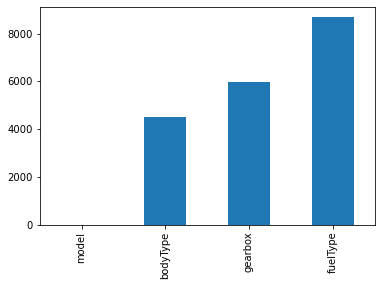

In [13]:
# visulize the null data of each attribution
nulldata1 = Train_data.isnull().sum()
nulldata1 = nulldata1[nulldata1 > 0]
# using sort_values to order nulldata, the inplace means that use modified dataset to replace orginal one
nulldata1.sort_values(inplace = True) #notice the True needs to be capitalized! 
nulldata1.plot.bar()

<AxesSubplot:>

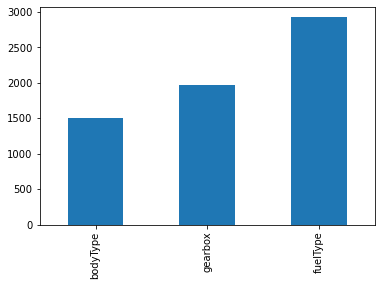

In [14]:
# visulize the null data of each attribution
nulldata2 = Test_data.isnull().sum()
nulldata2 = nulldata2[nulldata2 > 0]
# using sort_values to order nulldata, the inplace means that use modified dataset to replace orginal one
nulldata2.sort_values(inplace = True) #notice the True needs to be capitalized! 
nulldata2.plot.bar()

<AxesSubplot:>

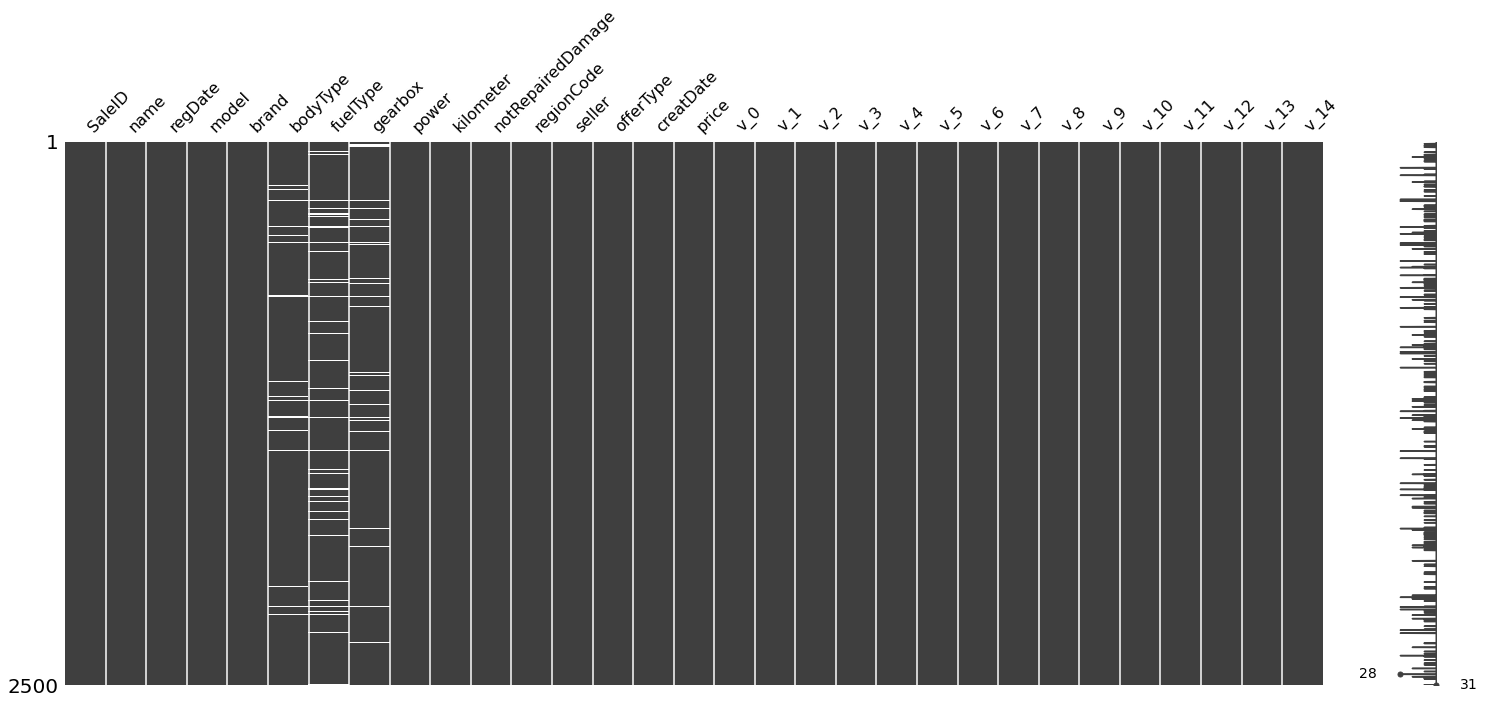

In [15]:
# sample will select 250 data randomly
msno.matrix(Train_data.sample(2500))

<AxesSubplot:>

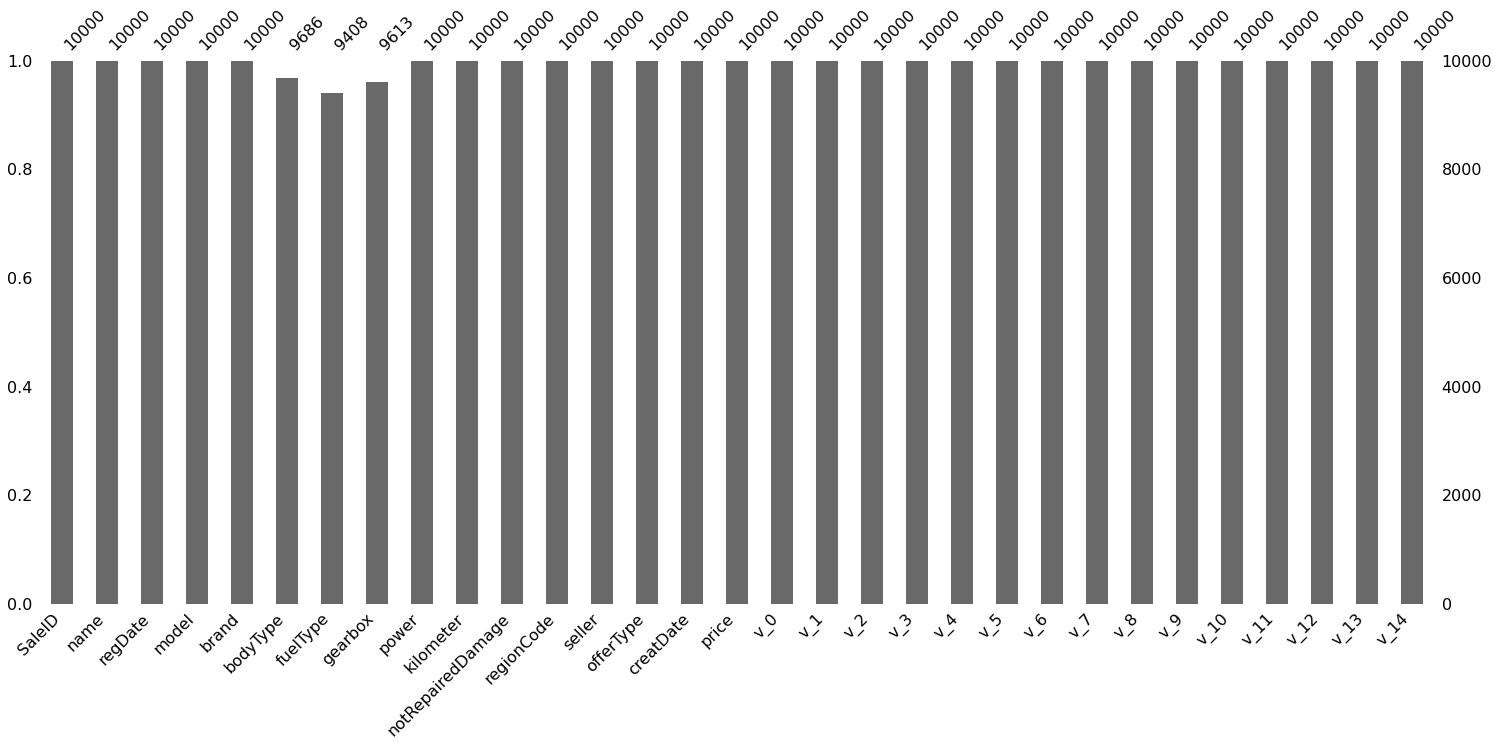

In [16]:
msno.bar(Train_data.sample(10000))

<AxesSubplot:>

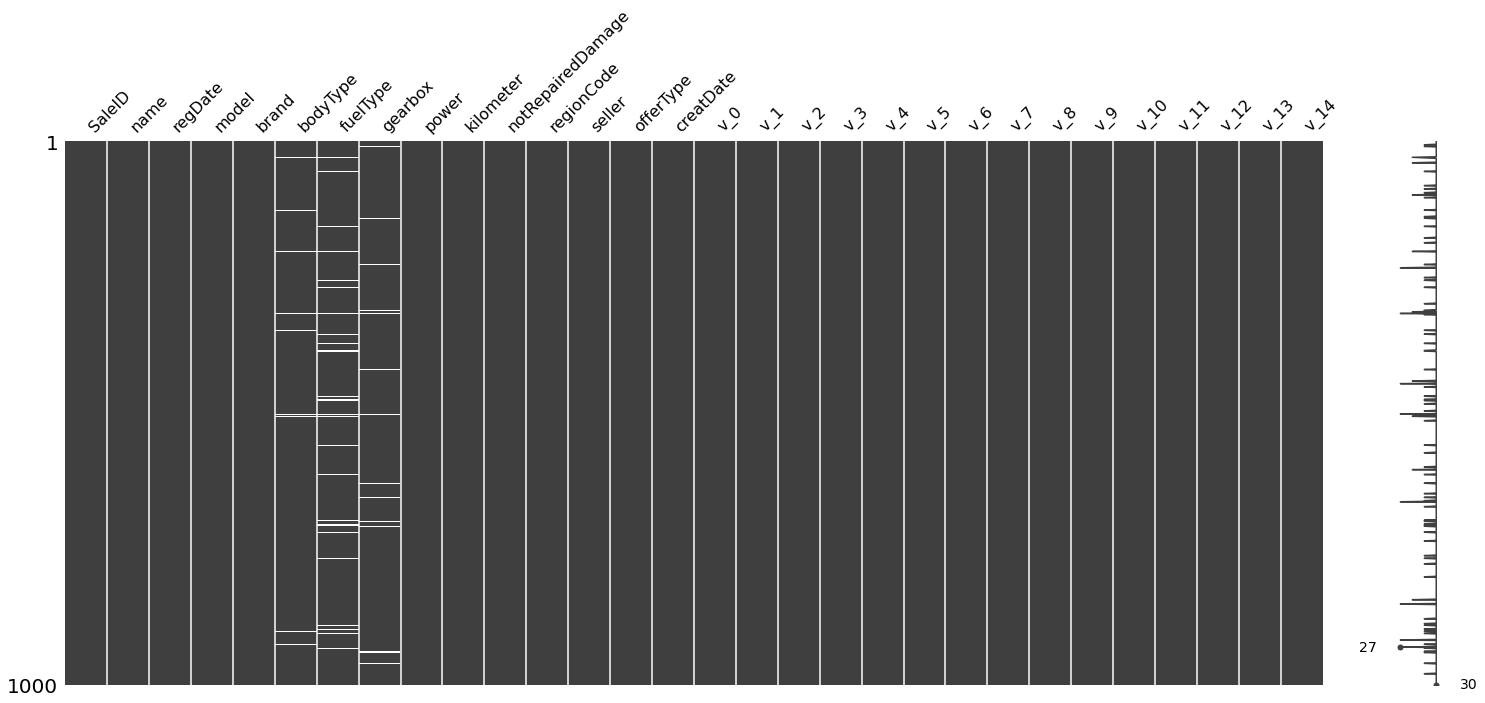

In [17]:
msno.matrix(Test_data.sample(1000))

<AxesSubplot:>

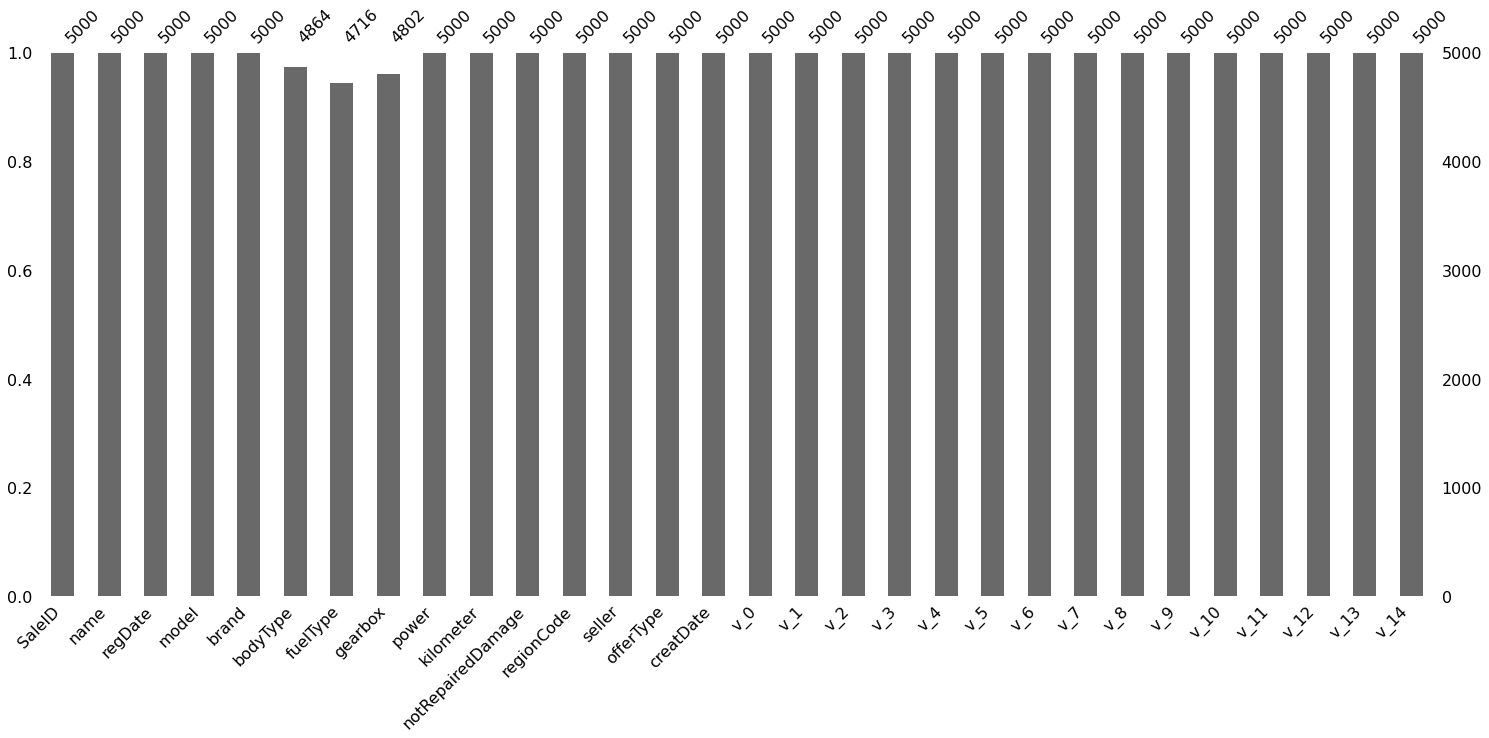

In [18]:
msno.bar(Test_data.sample(5000))

In [19]:
# Outlier detection(Train_data)
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [20]:
# as only the typy notrepaireddamage is object, it is essential to check it
Train_data['notRepairedDamage'].value_counts() #count every value

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [21]:
# '-' also can be regarded as 'null', thus we replace it with nan
Train_data['notRepairedDamage'].replace('-', np.nan, inplace = True)
Train_data['notRepairedDamage'].value_counts() #check again!

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [22]:
Train_data.isnull().sum() #we can see there are 24324 null of notRepairedDamage

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [23]:
Test_data['notRepairedDamage'].value_counts()

0.0    37224
-       8069
1.0     4707
Name: notRepairedDamage, dtype: int64

In [24]:
Test_data['notRepairedDamage'].replace('-', np.nan, inplace = True)
Test_data['notRepairedDamage'].value_counts()

0.0    37224
1.0     4707
Name: notRepairedDamage, dtype: int64

In [25]:
Test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             2924
gearbox              1968
power                   0
kilometer               0
notRepairedDamage    8069
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [26]:
# first skim the csv to check whether there are some attributions with heavily skewed characteristics
Train_data['offerType'].value_counts() 
# we can see in this category - 'offerTpye' all of values are 0, it is thought to be useless in prediction, delete.

0    150000
Name: offerType, dtype: int64

In [27]:
# find next one, one by one, by use value_counts()
Train_data['seller'].value_counts()
# 'seller' shows similar distribution

0    149999
1         1
Name: seller, dtype: int64

In [28]:
# check whether the situation also occurs in test_data
Test_data['offerType'].value_counts() 

0    50000
Name: offerType, dtype: int64

In [29]:
Test_data['seller'].value_counts()

0    50000
Name: seller, dtype: int64

In [30]:
# delete
del Train_data['offerType']
del Test_data['offerType']
del Train_data['seller']
del Test_data['seller']

In [31]:
# show the distribution of predicted value 'price'
Train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
1433        1
8911        1
12877       1
9885        1
8188        1
Name: price, Length: 3763, dtype: int64

<AxesSubplot:title={'center':'Log normal'}, xlabel='price'>

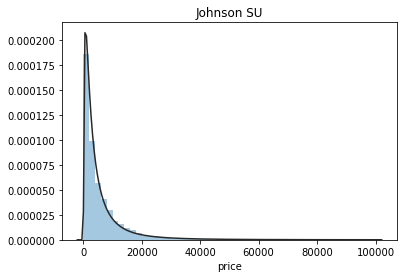

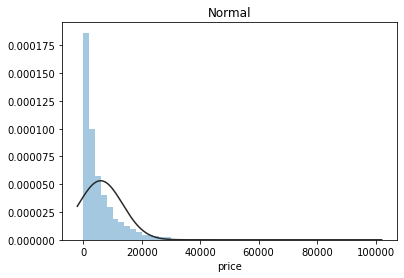

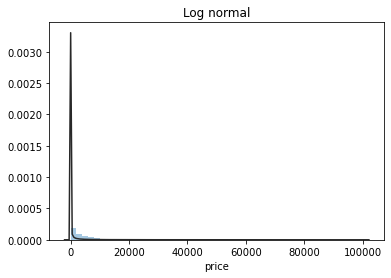

In [32]:
# show the distribution of 'price'
# if the distribution of train set is not similar with test set
# it means perhaps the model trained by train set is not appropriate to test set 
y = Train_data['price']
plt.figure(1)
plt.title("Johnson SU")
# kde: whether to plot a gaussian kernel density estimate.
sns.distplot(y, kde = False, fit = st.johnsonsu)
plt.figure(2)
plt.title("Normal")
sns.distplot(y, kde = False, fit = st.norm)
plt.figure(3)
plt.title("Log normal")
sns.distplot(y, kde = False, fit = st.lognorm)

Skewness: 3.346487
Kurtosis: 18.995183


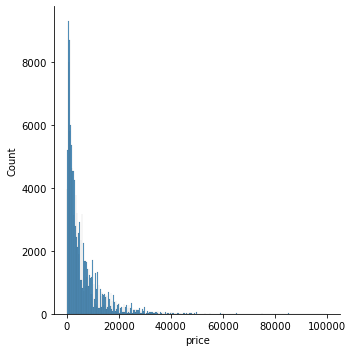

In [33]:
# as 'price' is not normal distribution and we want to use linear regression 
# thus we need to make variable 'price' become normal distribution
# caculate skewness and kurosis
sns.displot(Train_data['price'])
print("Skewness: %f" % Train_data['price'].skew()) #positive skewness means rightward bias
print("Kurtosis: %f" % Train_data['price'].kurt()) #high kurtosis means heavy tailed

(array([1.23906e+05, 1.89270e+04, 4.91800e+03, 1.34000e+03, 4.71000e+02,
        1.88000e+02, 1.24000e+02, 6.00000e+01, 4.80000e+01, 1.80000e+01]),
 array([1.10000e+01, 1.00098e+04, 2.00086e+04, 3.00074e+04, 4.00062e+04,
        5.00050e+04, 6.00038e+04, 7.00026e+04, 8.00014e+04, 9.00002e+04,
        9.99990e+04]),
 <BarContainer object of 10 artists>)

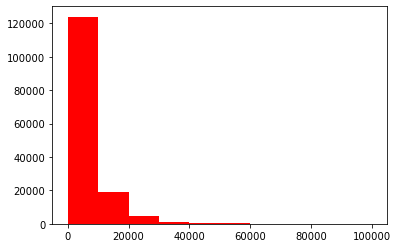

In [34]:
# check the frequency of train data
plt.hist(Train_data['price'], orientation = 'vertical', histtype = 'bar', color = 'red')
# according to the bar chat, the values > 20000 are rare, thus, in some degree, they can be thought as outliers

(array([   56.,   223.,  1508.,  6232., 22319., 35387., 39059., 33184.,
        11123.,   909.]),
 array([ 2.39789527,  3.30939729,  4.22089931,  5.13240133,  6.04390335,
         6.95540537,  7.86690739,  8.77840941,  9.68991143, 10.60141345,
        11.51291546]),
 <BarContainer object of 10 artists>)

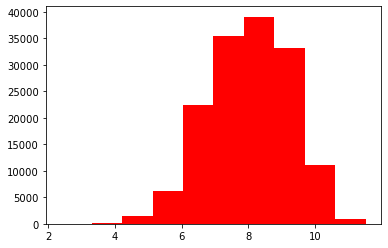

In [35]:
# to make the data like normal distribution, we use log to predict
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 

In [36]:
# seperate predicted value 'price'
Y_train = Train_data['price']

In [37]:
# this way is not appropriate for that case, because in this case, it has labels
# we need to divide it by real meaning
# select_dtype: select specific type, just like np.number(select number), np.object(select object)
# number
# numeric_features = Train_data.select_dtypes(include=[np.number])
# numeric_features.columns
# category
# categorical_features = Train_data.select_dtypes(include=[np.object])
# categorical_features.columns

In [38]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']

In [39]:
# check numerical feature
# append 'price' to numeric_feature
numeric_features.append('price')
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [40]:
# the analysis of correlation
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
# show each feature's correlation with price
print(correlation['price'].sort_values(ascending = False))

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64


<AxesSubplot:title={'center':'Heatmap(correlation of numeric features with Price)\n\n\n'}>

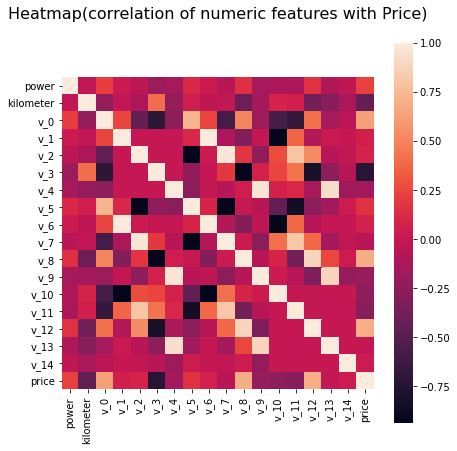

In [41]:
# draw heatmap
# figsize sets the width and length of one figure, unit:ft.
f, ax = plt.subplots(figsize = (7, 7))
plt.title('Heatmap(correlation of numeric features with Price)'+'\n\n\n', y = 1, size = 16)
sns.heatmap(correlation, square = True, vmax = 1)

In [42]:
del price_numeric['price']

In [43]:
# observe each feature'skewness and kurtosis
for col in numeric_features:
    print('{:11}'.format(col),'Skewness:{:5.2f}'.format(Train_data[col].skew()),'Kurtosis:{:05.2f}'.format(Train_data[col].kurt()))
# :11 the length

power       Skewness:65.86 Kurtosis:5733.45
kilometer   Skewness:-1.53 Kurtosis:01.14
v_0         Skewness:-1.32 Kurtosis:03.99
v_1         Skewness: 0.36 Kurtosis:-1.75
v_2         Skewness: 4.84 Kurtosis:23.86
v_3         Skewness: 0.11 Kurtosis:-0.42
v_4         Skewness: 0.37 Kurtosis:-0.20
v_5         Skewness:-4.74 Kurtosis:22.93
v_6         Skewness: 0.37 Kurtosis:-1.74
v_7         Skewness: 5.13 Kurtosis:25.85
v_8         Skewness: 0.20 Kurtosis:-0.64
v_9         Skewness: 0.42 Kurtosis:-0.32
v_10        Skewness: 0.03 Kurtosis:-0.58
v_11        Skewness: 3.03 Kurtosis:12.57
v_12        Skewness: 0.37 Kurtosis:00.27
v_13        Skewness: 0.27 Kurtosis:-0.44
v_14        Skewness:-1.19 Kurtosis:02.39
price       Skewness: 3.35 Kurtosis:19.00


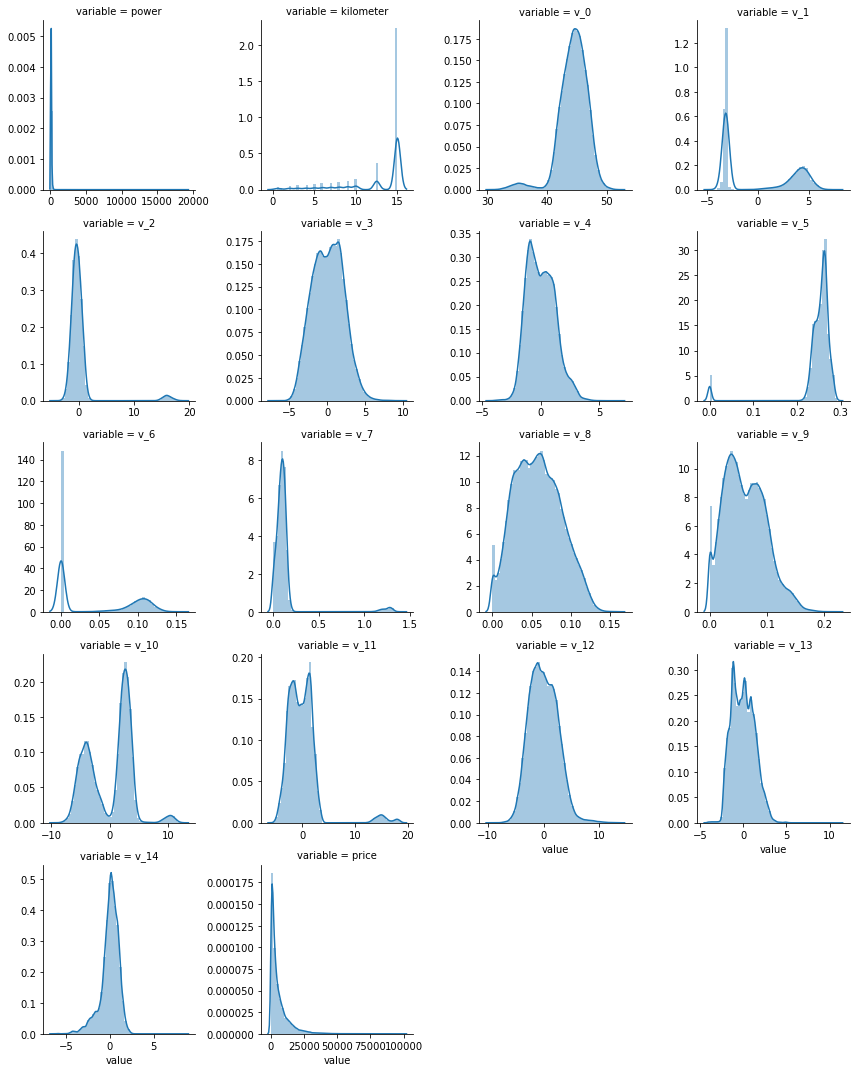

In [44]:
# visualize each distribution of numerical feature
f = pd.melt(Train_data, value_vars = numeric_features) # value_vars() select the features
g = sns.FacetGrid(f, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
g = g.map(sns.distplot, "value")
# A relatively even distribution of anonymous features can be seen

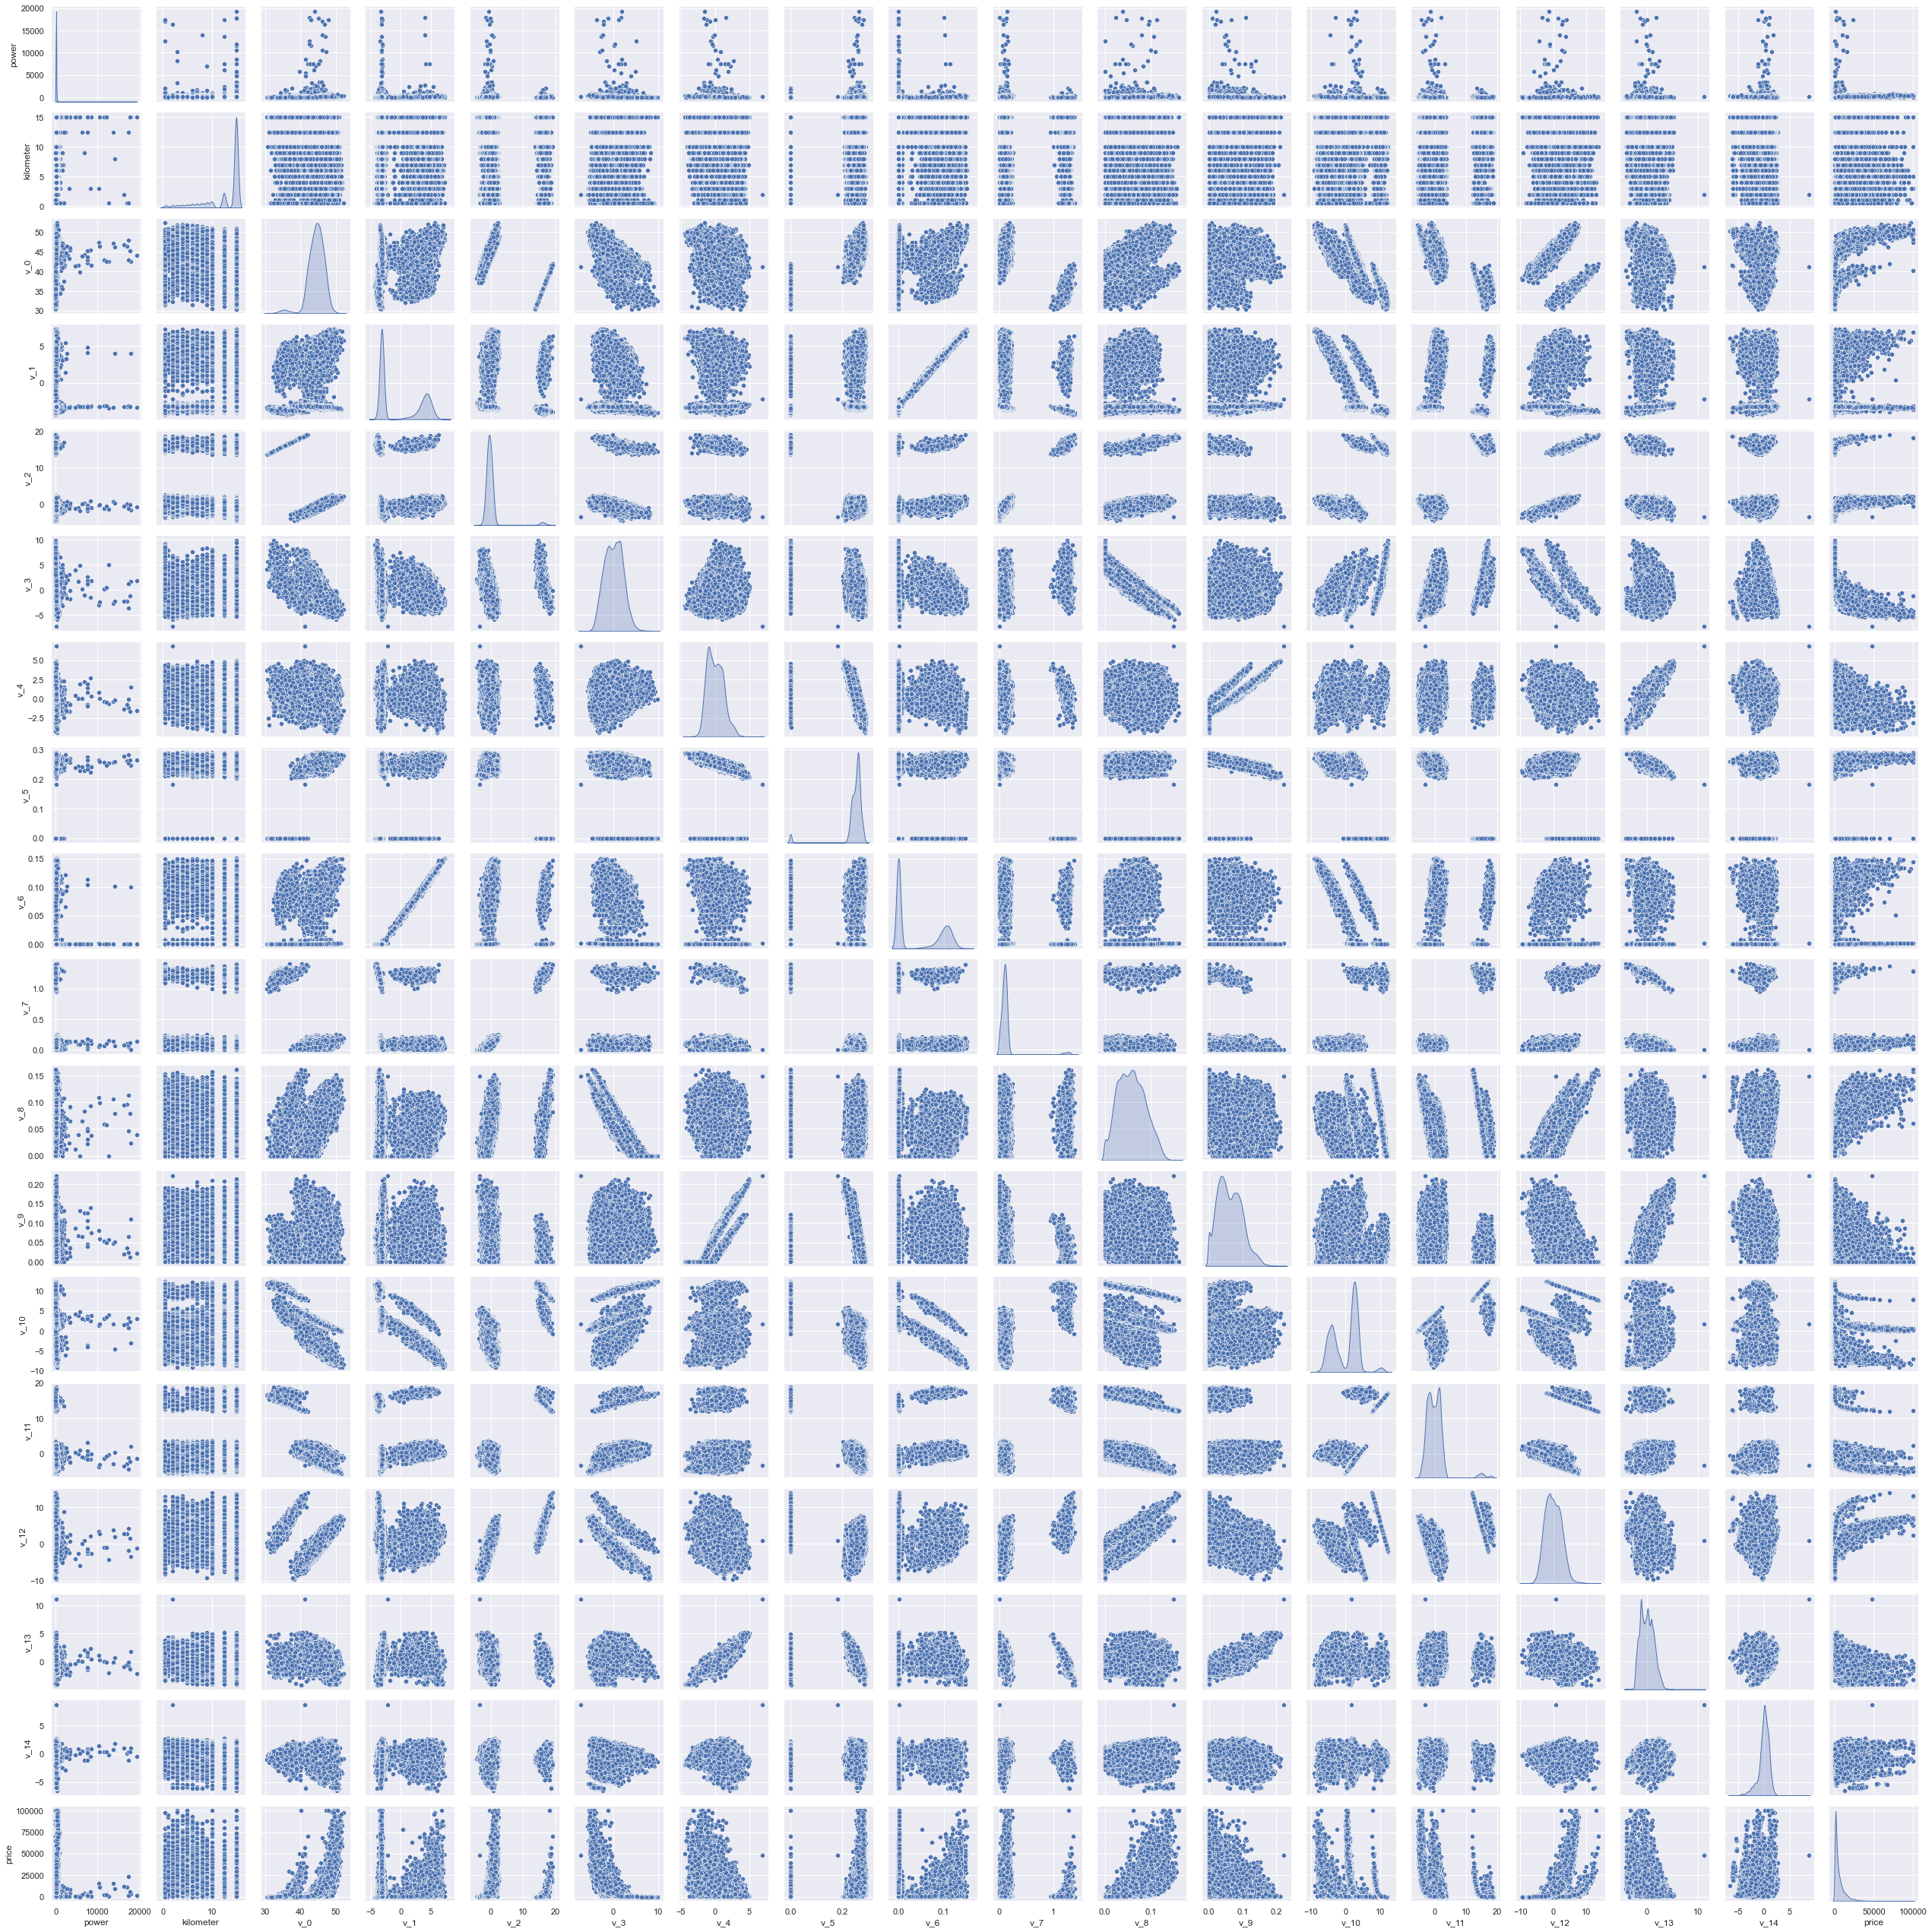

In [45]:
# select even distribution feature to find out the correlation
sns.set()
sns.pairplot(Train_data[numeric_features], size = 2, kind = 'scatter', diag_kind = 'kde')

<AxesSubplot:xlabel='v_14', ylabel='price'>

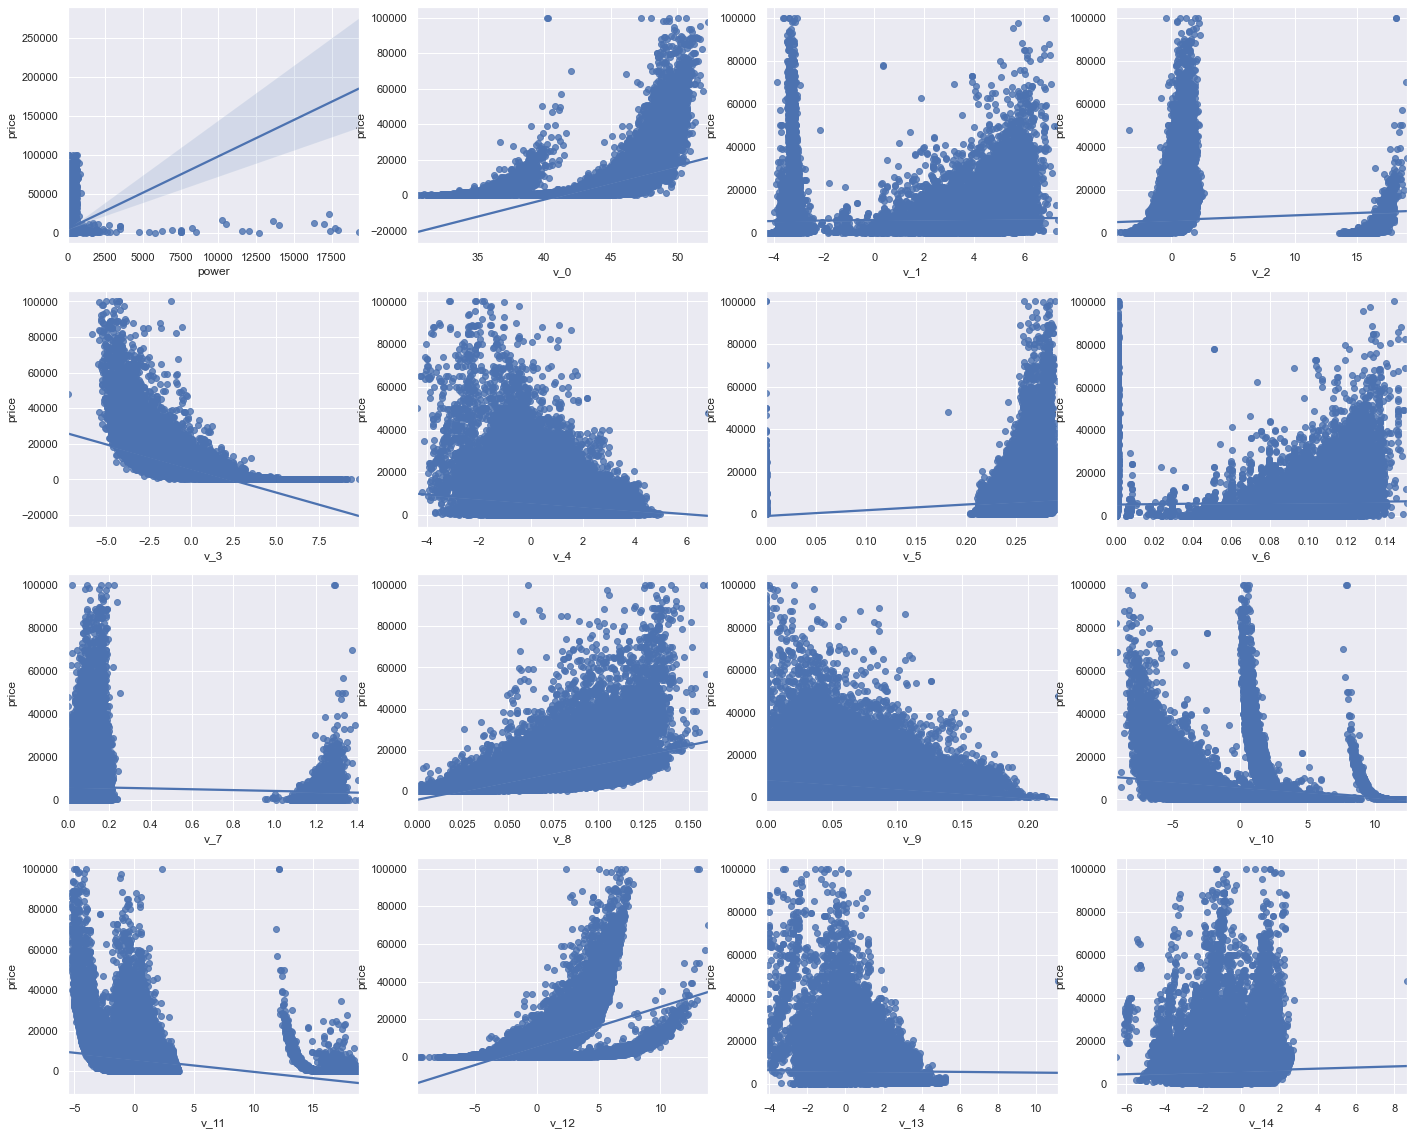

In [46]:
# https://www.jianshu.com/p/6e18d21a4cad Visualisation of relationships between multiple variables
# regplot make regression plot
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(nrows=4, ncols=4, figsize=(24, 20))
power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_3_scatter_plot = pd.concat([Y_train,Train_data['v_3']],axis = 1)
sns.regplot(x='v_3',y = 'price',data = v_3_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_4_scatter_plot = pd.concat([Y_train,Train_data['v_4']],axis = 1)
sns.regplot(x='v_4',y = 'price',data = v_4_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_7_scatter_plot = pd.concat([Y_train,Train_data['v_7']],axis = 1)
sns.regplot(x='v_7',y = 'price',data = v_7_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

v_9_scatter_plot = pd.concat([Y_train,Train_data['v_9']],axis = 1)
sns.regplot(x='v_9',y = 'price',data = v_9_scatter_plot,scatter= True, fit_reg=True, ax=ax11)

v_10_scatter_plot = pd.concat([Y_train,Train_data['v_10']],axis = 1)
sns.regplot(x='v_10',y = 'price',data = v_10_scatter_plot,scatter= True, fit_reg=True, ax=ax12)

v_11_scatter_plot = pd.concat([Y_train,Train_data['v_11']],axis = 1)
sns.regplot(x='v_11',y = 'price',data = v_11_scatter_plot,scatter= True, fit_reg=True, ax=ax13)

v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax14)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax15)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax16)

In [47]:
# Analysis of category
# nunique() to show the number of unique value
# check the distribution of category of Train_data.nunique()
for cat_fea in categorical_features:
    print('The distribution of ' + cat_fea +' is:')
    print('The feature {} has {} different values.'.format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

The distribution of name is:
The feature name has 99662 different values.
387       282
708       282
55        280
1541      263
203       233
         ... 
26403       1
28450       1
32544       1
102174      1
184730      1
Name: name, Length: 99662, dtype: int64
The distribution of model is:
The feature model has 248 different values.
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
242.0        2
209.0        2
245.0        2
240.0        2
247.0        1
Name: model, Length: 248, dtype: int64
The distribution of brand is:
The feature brand has 40 different values.
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      3

In [48]:
# transfer to category
# as 'name' and 'regioncode' are Sparse, we just discuss other features
categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']
for cat in categorical_features:
    for cal in categorical_features:
        Train_data[cal] = Train_data[cal].astype('category')
# the type 'category' has 1. limited quantity 2. in order 3.have stable categories, the value must be one of these categories
    if Train_data[cal].isnull().any(): #.any if there is no null, briefly, the result is zero, it will return False.
        Train_data[cal] = Train_data[cal].cat.add_categories(['MISSING'])  # add new category MISSING
        Train_data[cal] = Train_data[cal].fillna('MISSING') # fill nan with 'MISSING'

In [49]:
Train_data['notRepairedDamage']

0             0.0
1         MISSING
2             0.0
3             0.0
4             0.0
           ...   
149995        0.0
149996        0.0
149997        0.0
149998        0.0
149999        0.0
Name: notRepairedDamage, Length: 150000, dtype: category
Categories (3, object): ['0.0', '1.0', 'MISSING']

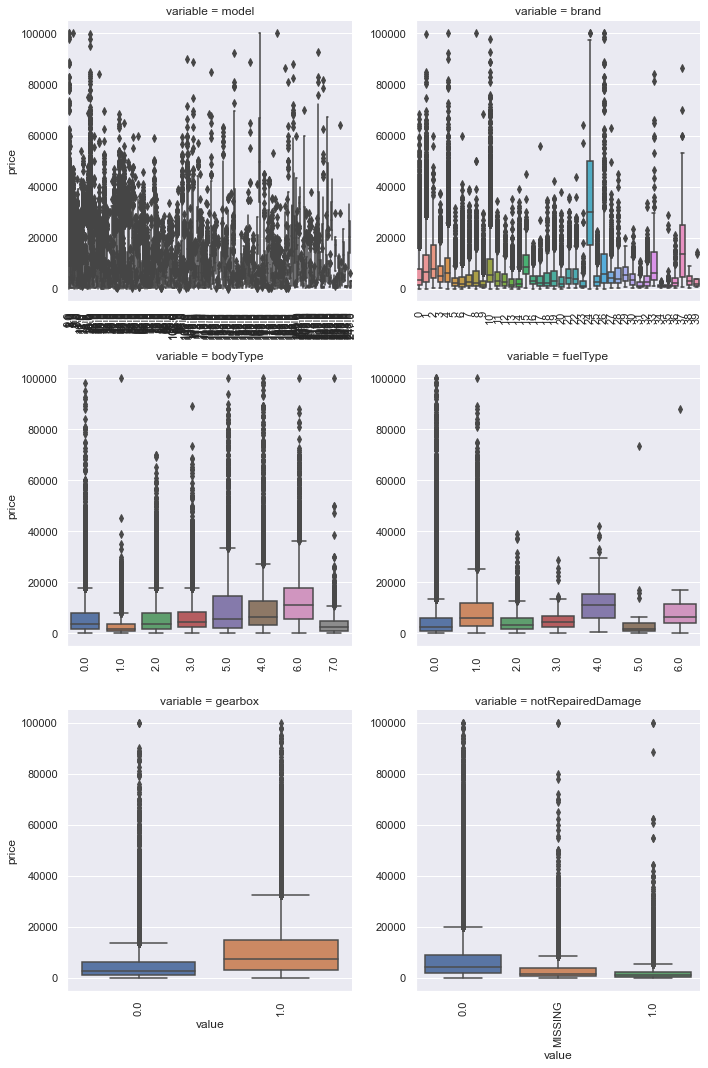

In [50]:
# boxplot
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90) # rotate x
f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")
    

In [51]:
# viloinplot(is simliar with Box，but it can show the density of distribution better)
#for cat in categorical_features:
    #sns.violinplot(x = cat, y = 'price', data = Train_data)
    #plt.show()
# however viloinplot is too small and crowded, it is not as easy as boxplot to read

In [52]:
categorical_features

['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']

In [78]:
pd.to_datetime(Train_data['regDate'])
Train_data['regDate1'] = Train_data['regDate'].apply(lambda x: str(x)[:4])
# The apply function automatically iterates through each row of the DataFrame and returns all the results as a Series data structure.
# str(x)[:4] to save the first four words

<AxesSubplot:xlabel='regDate1'>

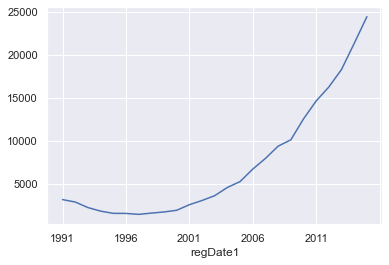

In [79]:
Train_data.groupby(['regDate1'])['price'].mean().plot()